In [2]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

import seaborn as sb
sb.set_style('whitegrid')
import matplotlib.pyplot as plt

import numpy as np

In [3]:
wine = datasets.load_wine()
wine_DF = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_DF

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


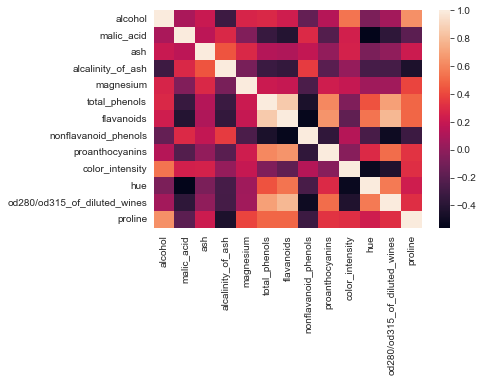

In [4]:
sb.heatmap(wine_DF.corr())

# Split data into train and test sets

In [17]:
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=100, test_size=0.3)

# Set up model
Going to try predicting the target 'class' of the different wines. 

In [6]:
from sklearn.svm import SVC

In [7]:
svc = SVC(kernel='linear', random_state=100)
svc.fit(x_train, y_train)
perc = '{:.2%}'.format(svc.score(x_test, y_test))
print('The SVC model can predict the class with %s accuracy.' %(perc))

The SVC model can predict the class with 92.59% accuracy.


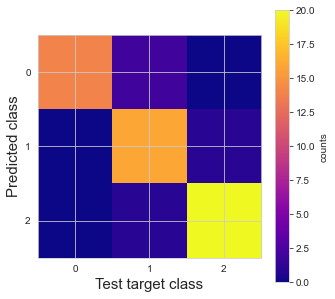

In [18]:
y_pred_class = svc.predict(x_test)

plt.figure(figsize=(5,5))
plt.imshow(metrics.confusion_matrix(y_pred_class, y_test), cmap='plasma')
plt.xticks([0,1,2])
plt.xlabel('Test target class', fontsize=15)
plt.yticks([0,1,2])
plt.ylabel('Predicted class', fontsize=15)
plt.colorbar(label='counts')

plt.savefig('pred_wine_class.png')
plt.show()

## Works pretty well! Let's see if we can predict other feartures of the wine with this data.

# Trying to predict alcohol concentration from other features
Because we are trying to predict numerical, continuous values here I will try the Lasso algorithm.

In [9]:
from sklearn.linear_model import Lasso

In [20]:
acl = wine_DF['alcohol'].values
data_for_acl = wine_DF[wine_DF.columns.difference(['alcohol'])].values

x_train, x_test, y_train, y_test = train_test_split(data_for_acl, acl, random_state=100, test_size=0.3)

In [11]:
lasso = Lasso(alpha=1.0, random_state=100)
lasso.fit(x_train, y_train)
lasso_perc = '{:.2%}'.format(lasso.score(x_test, y_test))
print('The Lasso model can predict the alcohol concentration of wine with %s accuracy.' %(lasso_perc))

The Lasso model can predict the alcohol concentration of wine with 21.97% accuracy.


### Not great... let's try `ridge_regression`

In [12]:
from sklearn.linear_model import Ridge

In [22]:
RR = Ridge(alpha=0.5, random_state=100)
RR.fit(x_train, y_train)
ridge_perc = '{:.2%}'.format(RR.score(x_test, y_test))
print('The Ridge Regression model can predict the alcohol concentration of wine with %s accuracy.' %(ridge_perc))

The Ridge Regression model can predict the alcohol concentration of wine with 46.12% accuracy.


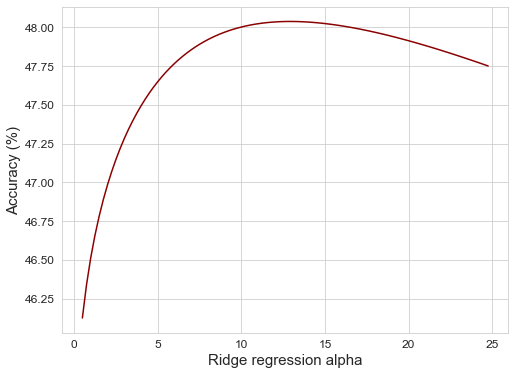

In [14]:
# exploring alpha values and its dependence on fit quality
alph = np.arange(0.5,25,0.25)
accuracy = []
for i in alph:
    RR = Ridge(alpha=i, random_state=100)
    RR.fit(x_train, y_train)
    accuracy.append(RR.score(x_test, y_test)*100)

plt.figure(figsize=(8,6))
plt.plot(alph,accuracy, color='darkred')
plt.xlabel('Ridge regression alpha', fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=15)
plt.yticks(fontsize=12)

plt.show()

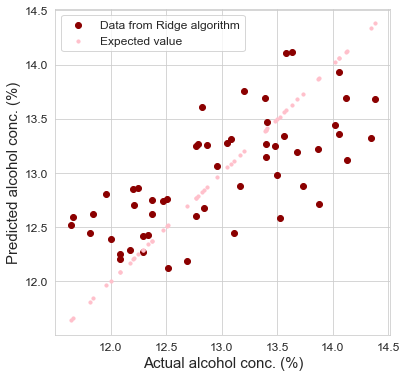

In [24]:
RR = Ridge(alpha=12, random_state=100)
RR.fit(x_train, y_train)

y_pred_alc = RR.predict(x_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_alc, color='darkred', label='Data from Ridge algorithm')
plt.scatter(y_test, y_test, s=10, color='pink', label='Expected value')
plt.xlabel('Actual alcohol conc. (%)', fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('Predicted alcohol conc. (%)', fontsize=15)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.savefig('pred_alc_conc.png')
plt.show()

## Obviously this kind of success rate is too low, and more needs to be done if I want to be able to predict this value with this data.